# Interactive Play

Idea: define and play high-level moves and show the results before and after with some kind of rendering

In [1]:
import sys
sys.path.insert(0, "../")
import copy
import matplotlib.pyplot as plt
import numpy as np
from SC_Utils.game_utils import init_game, ObsProcesser
from SC_Utils.render import *
from Utils import test_SCEnv_motion as actions

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
class InteractivePlay():
    def __init__(self, map_name, screen_res, minimap_res, **kwargs):
        self.screen_res = screen_res
        self.minimap_res = minimap_res
        self.current_state = None
        self.last_state = None
        game_params = dict(feature_screen=screen_res, feature_minimap=minimap_res, action_space="FEATURES") 
        self.env = init_game(game_params, map_name=map_name, max_steps=256, random_seed=1)
        self.obs_proc = ObsProcesser(**kwargs)
        
    def reset(self):
        obs = self.env.reset()
        state, names = self.obs_proc.get_state(obs)
        self.current_state = state
        self.render(names)
        return
    
    def step(self, action):
        self.last_state = copy.deepcopy(self.current_state)
        obs = self.env.step(actions=action)
        state, names = self.obs_proc.get_state(obs)
        self.current_state = state
        return names
    
    def render(self, names, screen_only=True):
        self.render_screen(names)
        if not screen_only:
            self.render_minimap()
        plt.show()
        return
    
    def render_screen(self, names):
        plot_screen(self.current_state, names, self.last_state)
        return
    
    def render_minimap(self):
        raise Exception('Not implemented')
    
    def interactive_step(self, action):
        names = self.step(action)
        self.render(names)
        return

In [3]:
map_name = 'MoveToBeacon'
screen_res, minimap_res = 64, 32
screen_names = ['visibility_map', 'player_relative', 'unit_density']
preproc_args = dict(screen_names=screen_names)

In [4]:
choices = ['upper-right',
           'upper-center',
           'upper-left',
           'middle-right',
           'middle-center',
           'middle-left',
           'lower-right',
           'lower-center',
           'lower-left']

RESOLUTION = screen_res
yx_points_dict = { 'upper-right':[0, RESOLUTION-1],
                   'upper-center':[0, RESOLUTION//2],
                   'upper-left':[0,0],
                   'middle-right':[RESOLUTION//2, RESOLUTION-1],
                   'middle-center':[RESOLUTION//2, RESOLUTION//2],
                   'middle-left':[RESOLUTION//2, 0],
                   'lower-right':[RESOLUTION-1,RESOLUTION-1],
                   'lower-center':[RESOLUTION-1,RESOLUTION//2],
                   'lower-left':[RESOLUTION-1, 0] 
                 }

In [5]:
iplay = InteractivePlay(map_name, screen_res, minimap_res, **preproc_args)

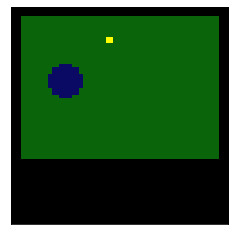

In [6]:
iplay.reset()

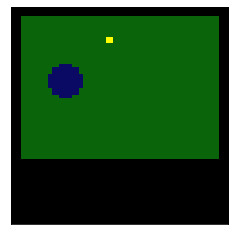

In [7]:
a = actions.select()
iplay.interactive_step(a)

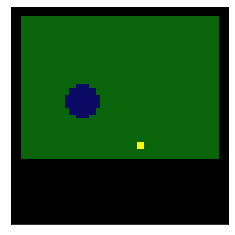

In [28]:
p = yx_points_dict['lower-right']
a = actions.move([p[1],p[0]]) # xfirst
iplay.interactive_step(a)